In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from plotting import all_diversities as test_diversities
from plotting import all_novelties as test_novelties

In [25]:
def read_list(filename: str) -> list:
    """ Extract the diversity or novelty list from txt file
    """
    import re
    with open(file=filename, mode='r', encoding="ISO-8859-1") as f:
        result_list = list()
        data = f.read().split(',\n')
        for line in data[0:]:
            result_list.extend(re.findall("\d+\.\d+", line))
    return result_list


def normal_distribution(values: list, name_of_values: str) -> None:
    """
    normal_distribution(all_diversities, 'Diversity of generated text')
    """

    
    mean = np.nanmean(values)
    sigma = np.nanstd(values)

    num_bins = 100

    fig, ax = plt.subplots()

    #the histogram of the data
    n, bins, _ = ax.hist(values, num_bins, normed=True)

    # add a 'best fit' line
    y = mlab.normpdf(bins, mean, sigma)
    ax.plot(bins, y, linewidth=2, color='r')
    ax.set_xlabel(name_of_values)
    ax.set_xlim([0.5,1])
    ax.set_ylabel('Probability density')
    ax.set_title(r'Histogram of distribution: $\mu={}$, $\sigma={}$'.format(
        round(mean, 3), round(sigma, 3)))

    # plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    #                          np.exp(- (bins - mean)**2 / (2 * sigma**2)),
    #                    linewidth=2, color='r')

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()

def get_scatter_plot(data_x, data_y, data_x1=None, data_y1=None):
    """ Scatter plot of novelties vs diversities. """
    plt.scatter(data_x1, data_y1, color='red', label='Real text', alpha=0.3)
    plt.scatter(data_x, data_y, color='blue', label='Fake text', alpha=0.3)

    plt.title('{} vs {} of sentences for generated text set'.format("Novelties", "Diversities"))
    plt.xlabel('Diversity of sentence')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.ylabel('Novelty of sentence')
    plt.legend(loc='upper left')
    plt.show()
    # plt.savefig('scatter.png')

In [6]:
# 

# fake_diversities = read_list('LeakGAN_diversities_intra_gen_jaccard.txt')
# fake_novelties = read_list('LeakGAN_novelties_gen_training_jaccard.txt')

# test_diversities = read_list('diversities_intra_gen.txt')
# test_novelties = read_list('diversities_intra_gen.txt')
# all_diversities = read_list('all_diversities_within_corpus.txt')
# print(len(all_diversities))
# normal_distribution(all_diversities, 'Novelties of generated text')
# get_scatter_plot(fake_diversities, fake_novelties)

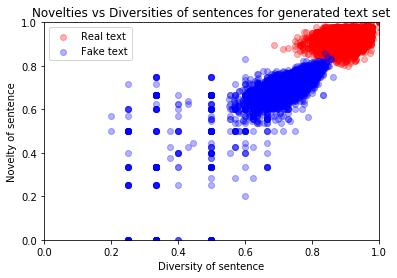

In [3]:
# Scatter plot 
# Novelty and Diversity for generated text # 2
# Jaccard text similarity

fake_diversities = read_list('LeakGAN_diversities_intra_gen_jaccard.txt')
fake_novelties = read_list('LeakGAN_novelties_gen_training_jaccard.txt')
get_scatter_plot(fake_diversities, fake_novelties)

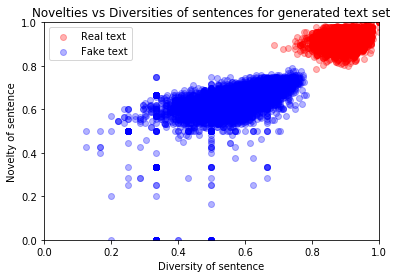

In [7]:
# Scatter plot 
# Novelty and Diversity for generated text # 3
# Jaccard text similarity

fake_diversities = read_list('LeakGAN_diversities_intra_gen3_jaccard.txt')
fake_novelties = read_list('LeakGAN_novelties_gen3_training_jaccard.txt')
get_scatter_plot(fake_diversities, fake_novelties)

10768


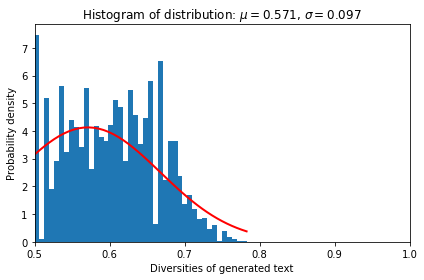

In [17]:
# Diversity of fake text

# test_diversities = read_list('LeakGAN_diversities_intra_gen3_jaccard.txt')
# test_novelties = read_list('diversities_intra_gen.txt')
all_diversities = read_list('LeakGAN_diversities_intra_gen3_jaccard.txt')
print(len(all_diversities))
normal_distribution(all_diversities, 'Diversities of generated text')

11054


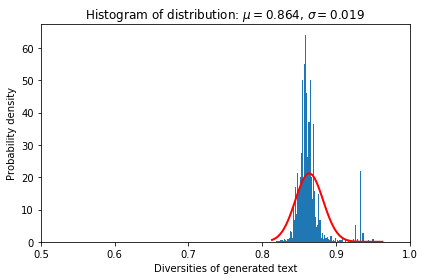

In [13]:
all_diversities = read_list('LeakGAN_diversities_intra_gen2_leven.txt')
print(len(all_diversities))
normal_distribution(all_diversities, 'Diversities of generated text')

10768


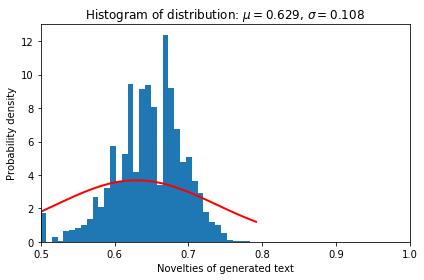

In [16]:
all_diversities = read_list('LeakGAN_novelties_gen3_training_jaccard.txt')
print(len(all_diversities))
normal_distribution(all_diversities, 'Novelties of generated text')

304221


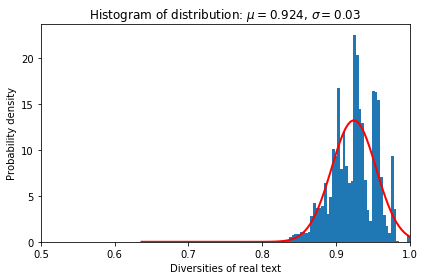

10784


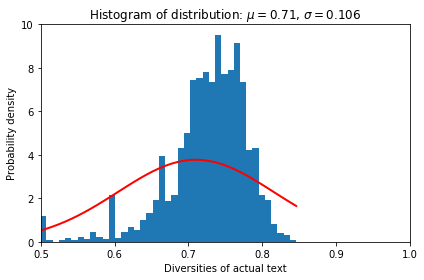

10768


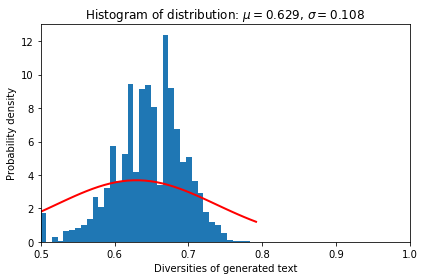

In [24]:
# Diversity of real text vs diversity of fake text

real_diversities = read_list('results/all_diversities_within_corpus.txt')
print(len(real_diversities))
normal_distribution(real_diversities, 'Diversities of real text')

actual_diversities = read_list('diversities_real.txt')
print(len(actual_diversities))
normal_distribution(actual_diversities, 'Diversities of actual text')

gen_diversities = read_list('LeakGAN_novelties_gen3_training_jaccard.txt')
print(len(gen_diversities))
normal_distribution(gen_diversities, 'Diversities of generated text')

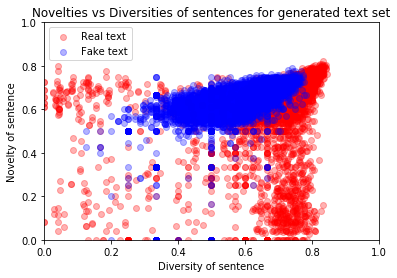

In [28]:
real_diversities = read_list('diversities_real.txt')
real_novelties = read_list('novelties_real.txt')

fake_diversities = read_list('LeakGAN_diversities_intra_gen3_jaccard.txt')
fake_novelties = read_list('LeakGAN_novelties_gen3_training_jaccard.txt')
get_scatter_plot(fake_diversities, fake_novelties, real_diversities, real_novelties)